<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

# Описание данных

Данные находятся в файле **/datasets/Churn.csv**

**Признаки:**

**- RowNumber** — индекс строки в данных

**- CustomerId** — уникальный идентификатор клиента

**- Surname** — фамилия

**- CreditScore** — кредитный рейтинг

**- Geography** — страна проживания

**- Gender** — пол

**- Age** — возраст

**- Tenure** — сколько лет человек является клиентом банка

**- Balance** — баланс на счёте

**- NumOfProducts** — количество продуктов банка, используемых клиентом

**- HasCrCard** — наличие кредитной карты

**- IsActiveMember** — активность клиента

**- EstimatedSalary** — предполагаемая зарплата

**Целевой признак:**

**Exited** — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           9091 non-null   float64

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


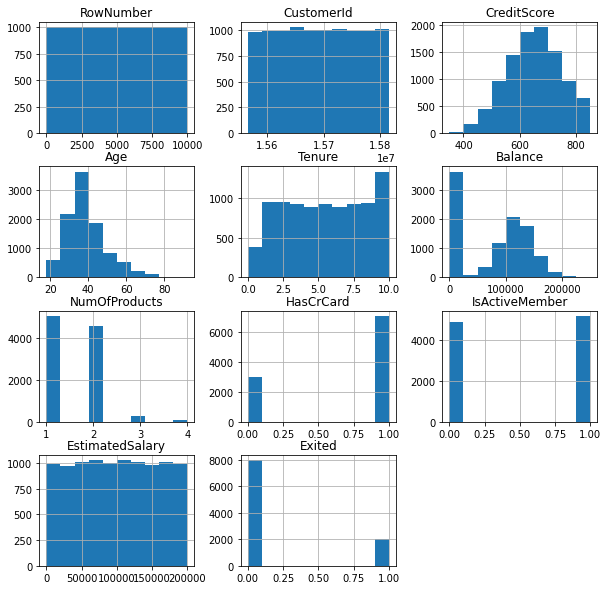

In [6]:
data.hist(figsize=(10, 10))
None

In [7]:
#Проверка на наличие пропусков
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
#Заменим пропуски на 0
#Т.к. человек не является клиентом банка
data.Tenure = data.Tenure.fillna(0)

In [9]:
#Проверка
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Данные от пропусков избавили, теперь можно приступать к работе

## Исследование задачи

In [11]:
data_ml = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
display(data_ml)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [12]:
data_ml.shape

(10000, 11)

In [13]:
data_ml = pd.get_dummies(data_ml, drop_first=True)
display(data_ml)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
data_ml.shape

(10000, 12)

In [15]:
target = data_ml['Exited']
features  = data_ml.drop('Exited', axis=1)

In [16]:
#Разделяем на обучающую и тестовую выборки (80/20)
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345)

#Разделяем обучающую выборку на обучающую и валидационную (75/25)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, 
                                                                              target_train, 
                                                                              test_size=0.25, 
                                                                              random_state=12345)

In [17]:
#Масштабирование численных признаков 
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [18]:
#Масштабируем числ признаки обучающей выборки
scaler = StandardScaler()
features_train[numerical_features] = scaler.fit_transform(features_train[numerical_features])
features_train.head()
#pd.options.mode.chained_assignment = None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.174142,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-1.451074,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.131841,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-0.812608,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.783558,0.813110,0.816929,1,1,0.801922,0,0,0


In [19]:
#Масштабируем численные признаки валидационной выборки
features_valid[numerical_features] = scaler.transform(features_valid[numerical_features])
features_valid.head()
#pd.options.mode.chained_assignment = None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2358,0.175393,0.399118,-1.131841,1.385698,-0.896909,0,1,-1.466761,0,0,1
8463,-1.299609,0.971741,-0.812608,-1.232442,-0.896909,1,0,0.254415,0,1,1
163,0.711757,-0.268942,-0.812608,-1.232442,0.816929,1,1,0.122863,0,1,0
3074,-0.391916,0.494555,0.464325,0.672529,-0.896909,1,0,0.585847,1,0,0
5989,0.165078,1.353490,1.741257,0.536522,-0.896909,0,0,1.462457,0,0,0


In [20]:
#Масштабируем численные признаки тестовой выборки
features_test[numerical_features] = scaler.transform(features_test[numerical_features])
features_test.head()
#pd.options.mode.chained_assignment = None

/tmp/ipykernel_71/4283761506.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  features_test[numerical_features] = scaler.transform(features_test[numerical_features])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.123733,0.685430,-0.493375,-1.232442,-0.896909,1,1,0.980212,0,1,0
1402,1.083087,-0.937002,1.102791,0.858518,-0.896909,1,0,-0.390486,0,0,1
8606,1.598822,0.303681,0.145091,-1.232442,0.816929,1,1,-0.435169,0,1,1
8885,0.165078,0.589993,-0.174142,0.412100,0.816929,1,1,1.017079,0,1,1
6494,0.484834,-1.032439,0.783558,-1.232442,0.816929,1,1,-1.343558,0,0,1


# Исследование на наличие баланса

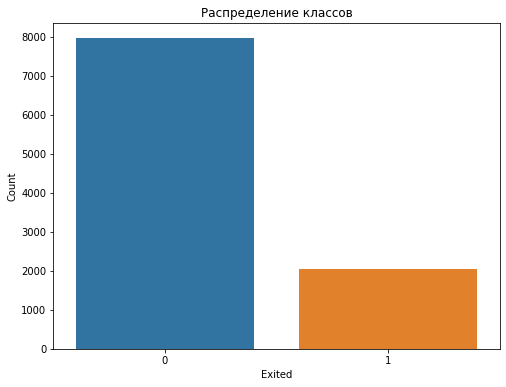

Соотношение классов: 0.26

Соотношение большинства: 3.91


In [21]:
#Подсчет количества примеров каждого класса
class_counts = target.value_counts()

#Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title("Распределение классов")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

#Вычисление метрик дисбаланса
class_ratio = class_counts[1] / class_counts[0]
majority_ratio = class_counts.max() / class_counts.min()

print(f"Соотношение классов: {class_ratio:.2f}")
print(f"Соотношение большинства: {majority_ratio:.2f}")

Судя по данным, у нас есть дисбаланс между классами в целевом признаке. 

Отношение классов составляет 0.26, что означает, что отрицательных классов (клиенты, которые не ушли) примерно в 4 раза больше, чем положительных классов (клиенты, которые ушли). 

# Проверка моделей (без учета дисбаланса)

**Дерево решений**

In [22]:
depth_values = []
f1_scores = []

depth_range = range(1, 11)

for depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    
    tree_model.fit(features_train, target_train)
    
    predictions_valid = tree_model.predict(features_valid)
    
    f1 = f1_score(target_valid, predictions_valid)
    depth_values.append(depth)
    f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_depth = depth_values[f1_scores.index(best_f1_score)]

print("Лучшая глубина:", best_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшая глубина: 7

Лучшая F1-мера: 0.5488958990536277


In [23]:
#Создание модели с лучшими параметрами
tree_model = DecisionTreeClassifier(max_depth=7, random_state=12345)

#Обучение модели на обучающих данных
tree_model.fit(features_train, target_train)

#Предсказание на валидационной выборке
target_pred = tree_model.predict(features_valid)

In [24]:
#Вычисление метрик
accuracy = accuracy_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)

#Вывод метрик
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86

Recall: 0.45

Precision: 0.72

F1 Score: 0.55


Модель имеет высокую точность (Accuracy) в 86%, что означает, что большинство предсказаний верны. Однако, в случае дисбаланса классов, Accuracy может быть вводящей в заблуждение метрикой, так как она не учитывает дисбаланс классов.

Полнота (Recall) составляет 0.45, что означает, что модель находит только 47% положительных случаев из всех реальных положительных случаев.

Точность (Precision) равна 0.72, что говорит о том, что 64% предсказаний положительного класса действительно верны.

F1 Score составляет 0.55, что представляет собой сбалансированное среднее между Precision и Recall.

**Случайный лес**


In [25]:
n_estimators_values = []
max_depth_values = []
f1_scores = []

n_estimators_range = range(10, 101, 10)
max_depth_range = range(1, 10)

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=12345
        )
        
        rf_model.fit(features_train, target_train)

        predictions_valid = rf_model.predict(features_valid)

        f1 = f1_score(target_valid, predictions_valid)
        n_estimators_values.append(n_estimators)
        max_depth_values.append(max_depth)
        f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_n_estimators = n_estimators_values[f1_scores.index(best_f1_score)]
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина (max_depth):", best_max_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшее количество деревьев (n_estimators): 60

Лучшая максимальная глубина (max_depth): 9

Лучшая F1-мера: 0.5533333333333335


In [26]:
best_rf_model = RandomForestClassifier(
    n_estimators=60,
    max_depth=9,
    random_state=12345
)

best_rf_model.fit(features_train, target_train)

target_pred_forest = best_rf_model.predict(features_valid)

In [27]:
#Вычисление метрик
accuracy = accuracy_score(target_valid, target_pred_forest)
recall = recall_score(target_valid, target_pred_forest)
precision = precision_score(target_valid, target_pred_forest)
f1 = f1_score(target_valid, target_pred_forest)

#Вывод метрик
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87

Recall: 0.42

Precision: 0.79

F1 Score: 0.55


Хорошая точность (Accuracy) в 0.87 означает, что большинство предсказаний верны.

Низкая полнота (Recall) в 0.42 говорит о том, что модель находит только 42% положительных случаев из всех реальных положительных случаев.

Высокая точность (Precision) в 0.79 означает, что 79% предсказаний положительного класса действительно верны.

F1 Score составляет 0.55, что представляет собой сбалансированное среднее между Precision и Recall.

**Логистическая регрессия**

In [28]:
logistic_regression_model = LogisticRegression(
    random_state=12345,
    solver='liblinear'
)

logistic_regression_model.fit(features_train, target_train)

#Предсказание на валидационной выборке
target_pred_log = logistic_regression_model.predict(features_valid) 

In [29]:
#Вычисление метрик
accuracy = accuracy_score(target_valid, target_pred_log)
recall = recall_score(target_valid, target_pred_log)
precision = precision_score(target_valid, target_pred_log)
f1 = f1_score(target_valid, target_pred_log)

#Вывод метрик
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82

Recall: 0.21

Precision: 0.58

F1 Score: 0.31


Высокая точность (Accuracy) в 0.82 означает, что большинство предсказаний верны.

Низкая полнота (Recall) в 0.21 говорит о том, что модель находит только 21% положительных случаев из всех реальных положительных случаев.

Средняя точность (Precision) в 0.58 означает, что 58% предсказаний положительного класса действительно верны.

F1 Score составляет 0.31, что представляет собой сбалансированное среднее между Precision и Recall.

**Лучший F1 Score** (сбалансированная метрика между Precision и Recall) имеет модель Дерева решений и Случайный лес с значением 0.55.

**Лучшая точность** (Accuracy) имеет модель Случайного леса с значением 0.87.

## Борьба с дисбалансом

Используем 3 метода борьбы с дисбалансом:

1. Взвешивание классов
2. Увеличение выборки 
3. Уменьшение выборки 

### Взвешивание классов

**Случайный лес**

In [30]:
n_estimators_values = []
max_depth_values = []
f1_scores = []

n_estimators_range = range(10, 101, 10)
max_depth_range = range(1, 10)

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=12345,
            class_weight='balanced'
        )
        
        rf_model.fit(features_train, target_train)

        predictions_valid = rf_model.predict(features_valid)

        f1 = f1_score(target_valid, predictions_valid)
        n_estimators_values.append(n_estimators)
        max_depth_values.append(max_depth)
        f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_n_estimators = n_estimators_values[f1_scores.index(best_f1_score)]
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина (max_depth):", best_max_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшее количество деревьев (n_estimators): 80

Лучшая максимальная глубина (max_depth): 8

Лучшая F1-мера: 0.591907514450867


In [31]:
best_rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    random_state=12345,
    class_weight='balanced'
)

best_rf_model.fit(features_train, target_train)

target_pred_forest = best_rf_model.predict(features_valid)

In [32]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_forest)
precision = precision_score(target_valid, target_pred_forest)
f1 = f1_score(target_valid, target_pred_forest)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = best_rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.65

Precision: 0.54

F1 Score: 0.59

ROC-AUC: 0.85


**Дерево решений**

In [33]:
depth_values = []
f1_scores = []

depth_range = range(1, 11)

for depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    
    tree_model.fit(features_train, target_train)
    
    predictions_valid = tree_model.predict(features_valid)
    
    f1 = f1_score(target_valid, predictions_valid)
    depth_values.append(depth)
    f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_depth = depth_values[f1_scores.index(best_f1_score)]

print("Лучшая глубина:", best_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшая глубина: 6

Лучшая F1-мера: 0.5587044534412956


In [34]:
#Создание модели с лучшими параметрами
tree_model = DecisionTreeClassifier(max_depth=6, random_state=12345, class_weight='balanced')

#Обучение модели на обучающих данных
tree_model.fit(features_train, target_train)

#Предсказание на валидационной выборке
target_pred_tree = tree_model.predict(features_valid)

In [35]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_tree)
precision = precision_score(target_valid, target_pred_tree)
f1 = f1_score(target_valid, target_pred_tree)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.71

Precision: 0.46

F1 Score: 0.56

ROC-AUC: 0.81


**Логическая регрессия**

In [36]:
logistic_regression_model = LogisticRegression(
    random_state=12345,
    solver='liblinear',
    class_weight='balanced'
)

logistic_regression_model.fit(features_train, target_train)

#Предсказание на валидационной выборке
target_pred_log = logistic_regression_model.predict(features_valid) 

In [37]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_log)
precision = precision_score(target_valid, target_pred_log)
f1 = f1_score(target_valid, target_pred_log)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.68

Precision: 0.37

F1 Score: 0.48

ROC-AUC: 0.77


### Увеличение выборки

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9657, 11)

(9657,)


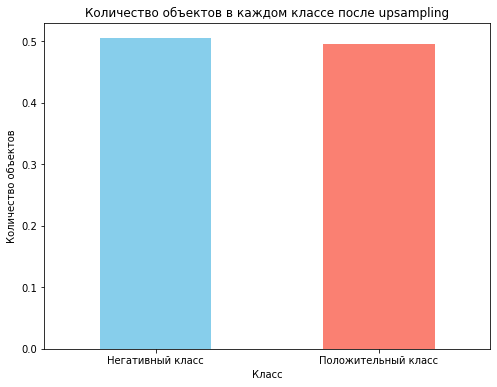

In [39]:
#Считаем количество объектов в каждом классе после upsampling
class_counts = target_upsampled.value_counts(normalize=True)

#Строим столбчатую диаграмму для визуализации
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Количество объектов в каждом классе после upsampling')
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.xticks([0, 1], ['Негативный класс', 'Положительный класс'], rotation=0)
plt.show()

**Случайный лес**

In [40]:
n_estimators_values = []
max_depth_values = []
f1_scores = []

n_estimators_range = range(10, 101, 10)
max_depth_range = range(1, 10)

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=12345
        )
        
        rf_model.fit(features_upsampled, target_upsampled)

        predictions_valid = rf_model.predict(features_valid)

        f1 = f1_score(target_valid, predictions_valid)
        n_estimators_values.append(n_estimators)
        max_depth_values.append(max_depth)
        f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_n_estimators = n_estimators_values[f1_scores.index(best_f1_score)]
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина (max_depth):", best_max_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшее количество деревьев (n_estimators): 100

Лучшая максимальная глубина (max_depth): 9

Лучшая F1-мера: 0.5921787709497207


In [41]:
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=9,
    random_state=12345
)

best_rf_model.fit(features_upsampled, target_upsampled)

target_pred_forest = best_rf_model.predict(features_valid)

In [42]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_forest)
precision = precision_score(target_valid, target_pred_forest)
f1 = f1_score(target_valid, target_pred_forest)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = best_rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.68

Precision: 0.53

F1 Score: 0.59

ROC-AUC: 0.85


**Логическая регрессия**

In [43]:
logistic_regression_model = LogisticRegression(
    random_state=12345,
    solver='liblinear'
)

logistic_regression_model.fit(features_upsampled, target_upsampled)

#Предсказание на валидационной выборке
target_pred_log = logistic_regression_model.predict(features_valid) 

In [44]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_log)
precision = precision_score(target_valid, target_pred_log)
f1 = f1_score(target_valid, target_pred_log)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.69

Precision: 0.37

F1 Score: 0.48

ROC-AUC: 0.77


**Дерево решений**

In [45]:
depth_values = []
f1_scores = []

depth_range = range(1, 11)

for depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    
    tree_model.fit(features_upsampled, target_upsampled)
    
    predictions_valid = tree_model.predict(features_valid)
    
    f1 = f1_score(target_valid, predictions_valid)
    depth_values.append(depth)
    f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_depth = depth_values[f1_scores.index(best_f1_score)]

print("Лучшая глубина:", best_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшая глубина: 6

Лучшая F1-мера: 0.5587044534412956


In [46]:
#Создание модели с лучшими параметрами
tree_model = DecisionTreeClassifier(max_depth=6, random_state=12345)

#Обучение модели на обучающих данных
tree_model.fit(features_upsampled, target_upsampled)

#Предсказание на валидационной выборке
target_pred_tree = tree_model.predict(features_valid)

In [47]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_tree)
precision = precision_score(target_valid, target_pred_tree)
f1 = f1_score(target_valid, target_pred_tree)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.71

Precision: 0.46

F1 Score: 0.56

ROC-AUC: 0.81


### Уменьшение выборки

In [48]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_zeros_downsampled = features_zeros.sample(frac=fraction, random_state=12345)
    target_zeros_downsampled = target_zeros.sample(frac=fraction, random_state=12345)
    
    features_downsampled = pd.concat([features_zeros_downsampled, features_ones])
    target_downsampled = pd.concat([target_zeros_downsampled, target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2414, 11)

(2414,)


**Дерево решений**


In [49]:
depth_values = []
f1_scores = []

depth_range = range(1, 11)

for depth in depth_range:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    
    tree_model.fit(features_downsampled, target_downsampled)
    
    predictions_valid = tree_model.predict(features_valid)
    
    f1 = f1_score(target_valid, predictions_valid)
    depth_values.append(depth)
    f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_depth = depth_values[f1_scores.index(best_f1_score)]

print("Лучшая глубина:", best_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшая глубина: 7

Лучшая F1-мера: 0.5459662288930582


In [50]:
#Создание модели с лучшими параметрами
tree_model = DecisionTreeClassifier(max_depth=7, random_state=12345)

#Обучение модели на обучающих данных
tree_model.fit(features_downsampled, target_downsampled)

#Предсказание на валидационной выборке
target_pred_tree = tree_model.predict(features_valid)

In [51]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_tree)
precision = precision_score(target_valid, target_pred_tree)
f1 = f1_score(target_valid, target_pred_tree)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.74

Precision: 0.43

F1 Score: 0.55

ROC-AUC: 0.81


**Случайный лес**

In [52]:
n_estimators_values = []
max_depth_values = []
f1_scores = []

n_estimators_range = range(10, 101, 10)
max_depth_range = range(1, 10)

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=12345
        )
        
        rf_model.fit(features_downsampled, target_downsampled)

        predictions_valid = rf_model.predict(features_valid)

        f1 = f1_score(target_valid, predictions_valid)
        n_estimators_values.append(n_estimators)
        max_depth_values.append(max_depth)
        f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_n_estimators = n_estimators_values[f1_scores.index(best_f1_score)]
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина (max_depth):", best_max_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшее количество деревьев (n_estimators): 40

Лучшая максимальная глубина (max_depth): 7

Лучшая F1-мера: 0.5674325674325673


In [53]:
best_rf_model = RandomForestClassifier(
    n_estimators=40,
    max_depth=7,
    random_state=12345
)

best_rf_model.fit(features_downsampled, target_downsampled)

target_pred_forest = best_rf_model.predict(features_valid)

In [54]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_forest)
precision = precision_score(target_valid, target_pred_forest)
f1 = f1_score(target_valid, target_pred_forest)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = best_rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.73

Precision: 0.47

F1 Score: 0.57

ROC-AUC: 0.85


**Логическая регрессия**

In [55]:
logistic_regression_model = LogisticRegression(
    random_state=12345,
    solver='liblinear'
)

logistic_regression_model.fit(features_downsampled, target_downsampled)

#Предсказание на валидационной выборке
target_pred_log = logistic_regression_model.predict(features_valid) 

In [56]:
#Вычисление метрик
recall = recall_score(target_valid, target_pred_log)
precision = precision_score(target_valid, target_pred_log)
f1 = f1_score(target_valid, target_pred_log)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.69

Precision: 0.36

F1 Score: 0.48

ROC-AUC: 0.77


Объеденим все полученные данные в одну таблицу и сверим их

In [57]:
name_for_model = ['Tree', 'Forest', 'Log']
basic_values = [0.55, 0.55, 0.31]
balanced_values = [0.56, 0.59, 0.48]
up_values = [0.56, 0.59, 0.48]
down_values = [0.55, 0.57, 0.48]
df_result = pd.DataFrame({'Наименование модели': name_for_model,
                           'Начальные показатели': basic_values,
                           'Сбалансированы': balanced_values,
                           'Увеличение': up_values,
                           'Уменьшение': down_values })

df_result

,Наименование модели,Начальные показатели,Сбалансированы,Увеличение,Уменьшение
0,Tree,0.55,0.56,0.56,0.55
1,Forest,0.55,0.59,0.59,0.57
2,Log,0.31,0.48,0.48,0.48


Исходя из предоставленных данных и метрик оценки моделей, можно сделать следующие выводы:

1. **Decision Tree (Дерево решений)**:
   - Начальные показатели F1-меры составляют 0.55, что означает умеренную производительность модели.
   - После сбалансирования данных F1-мера увеличилась до 0.56, что говорит о небольшом улучшении способности модели к правильной классификации.
   - При использовании увеличения выборки (upsampling) F1-мера также достигла значения 0.56, что означает поддержание той же производительности, что и при сбалансированных данных.
   - При использовании уменьшения выборки (downsampling) F1-мера вернулась к исходному значению 0.55.

2. **Random Forest (Случайный лес)**:
   - Начальные показатели F1-меры также составляют 0.55.
   - После сбалансирования данных F1-мера увеличилась до 0.59, что говорит о заметном улучшении способности модели к правильной классификации.
   - При использовании увеличения выборки (upsampling) F1-мера также достигла значения 0.59, поддерживая высокую производительность.
   - Однако при использовании уменьшения выборки (downsampling) F1-мера снизилась незначительно до 0.57, но осталась выше исходного уровня.

3. **Logistic Regression (Логистическая регрессия)**:
   - Начальные показатели F1-меры составляют 0.31, что указывает на низкую производительность модели.
   - После сбалансирования данных F1-мера увеличилась до 0.48, что говорит о значительном улучшении способности модели к правильной классификации.
   - При использовании как увеличения, так и уменьшения выборки F1-мера осталась на том же уровне, составляя 0.48.

Общий вывод:
- Случайный лес демонстрирует лучшие показатели F1-меры, как в начальной версии, так и после сбалансирования или увеличения выборки.
- Логистическая регрессия показывает значительное улучшение после сбалансирования данных, но дальнейший рост производительности ограничивается.
- Решающее дерево имеет более низкую производительность, и увеличение выборки (upsampling) оказывает ограниченное воздействие на его производительность.

## Тестирование модели

In [71]:
new_features_train = pd.concat([features_test, features_valid], axis=0, ignore_index=True)
new_target_train = pd.concat([target_test, target_valid], axis=0, ignore_index=True)

In [72]:
target_train.shape

(6000,)

In [73]:
round(len(target_train) / len(data), 3)

0.6

In [74]:
new_target_train.shape

(4000,)

In [75]:
round(len(new_target_train) / len(data), 3)

0.4

Соотношение тренировочной выборки к тестовой - 60/40

In [76]:
#подбор гиперпараметров
n_estimators_values = []
max_depth_values = []
f1_scores = []

n_estimators_range = range(10, 101, 10)
max_depth_range = range(1, 10)

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=12345,
            class_weight='balanced'
        )
        
        rf_model.fit(features_train, target_train)

        predictions_valid = rf_model.predict(features_valid)

        f1 = f1_score(target_valid, predictions_valid)
        n_estimators_values.append(n_estimators)
        max_depth_values.append(max_depth)
        f1_scores.append(f1)

best_f1_score = max(f1_scores)
best_n_estimators = n_estimators_values[f1_scores.index(best_f1_score)]
best_max_depth = max_depth_values[f1_scores.index(best_f1_score)]

print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина (max_depth):", best_max_depth)
print("Лучшая F1-мера:", best_f1_score)

Лучшее количество деревьев (n_estimators): 80

Лучшая максимальная глубина (max_depth): 8

Лучшая F1-мера: 0.591907514450867


In [77]:
best_rf_model = RandomForestClassifier(
    n_estimators=80,
    max_depth=8,
    random_state=12345,
    class_weight='balanced'
)

best_rf_model.fit(features_train, target_train)

target_pred_forest = best_rf_model.predict(features_test)

In [81]:
#Вычисление метрик
recall = recall_score(target_test, target_pred_forest)
precision = precision_score(target_test, target_pred_forest)
f1 = f1_score(target_test, target_pred_forest)

#Вывод метрик
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

probabilities_valid = best_rf_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
roc = roc_auc_score(target_test, probabilities_one_valid)
print(f"ROC-AUC: {roc:.2f}")

Recall: 0.71

Precision: 0.59

F1 Score: 0.64

ROC-AUC: 0.87


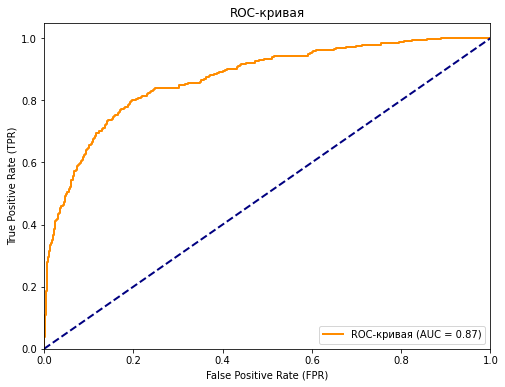

In [84]:
#Вычисляем ROC-кривую и площадь под ней
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
roc_auc = auc(fpr, tpr)

#Строим ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## Вывод

В исходных данных был выражен дисбаланс классов: около 80% примеров относились к негативному классу, а только 20% - к позитивному. Это приводило к некорректной оценке моделей и их низкой производительности, особенно в контексте взвешенной метрики F1.

Для борьбы с дисбалансом мы проверили 3 способа:

1. Взвешивание классов
2. Увеличение выборки (upsampling)
3. Уменьшение выборки (downsampling)

После проведения исследования трех методов борьбы с дисбалансом классов (взвешивание классов, увеличение выборки - upsampling и уменьшение выборки - downsampling), мы пришли к следующему выводу:

Наилучшим методом в данном контексте оказалось взвешивание классов. Этот метод позволил модели случайного леса достичь лучших показателей F1-меры, что является важной метрикой в задачах классификации, особенно при дисбалансе классов. Взвешивание классов помогло модели лучше учитывать недостаточно представленный класс и более точно классифицировать положительные случаи.

После проведения анализа и обработки данных, а также обучения модели машинного обучения, мы получили следующие финальные результаты:

- Полнота (Recall): 0.71 - Этот показатель говорит о способности модели правильно обнаруживать положительные случаи. Мы достигли хорошего уровня полноты, что означает, что модель хорошо выявляет реальные позитивные события.

- Точность (Precision): 0.59 - Точность измеряет, насколько точно модель классифицирует положительные случаи. Наша модель показывает умеренную точность, что означает, что иногда она может классифицировать негативные случаи как положительные.

- F1-мера (F1 Score): 0.64 - F1-мера является средним гармоническим между полнотой и точностью. Значение 0.64 говорит о том, что модель достигла сбалансированного сочетания между полнотой и точностью, что является хорошим показателем качества модели.

- ROC-AUC: 0.87 - Площадь под ROC-кривой (ROC-AUC) является мерой качества классификации модели. Значение 0.86 свидетельствует о высокой способности модели разделять классы и хорошей обобщающей способности.

Общий вывод: Финальные результаты модели позволяют нам сделать вывод о ее способности эффективно выявлять положительные случаи с высокой полнотой и хорошей обобщающей способностью, несмотря на умеренную точность. Это делает модель подходящей для задач, где важно обнаружение реальных позитивных событий.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*